<a href="https://colab.research.google.com/github/arthireddyannad/Data-Analytics/blob/main/ML_Round_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***LETS START OUR PROJECT ON NEW YORK RESTAURANTS INSPECTION DATA TO GENERATE INSIGHTS THAT CREATE AN IMPACT ***

# **BRIEFING: ** We are using New York Restaurants Inspection data for our project to dive deeply and analyze. Will be deriving some key insights that idenitify the restaurants that are at risk of getting inspected in near future.

**STEP 1:** Importing the necessary libraries for our analysis

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC




from sklearn.metrics import confusion_matrix, classification_report

**STEP 2:** Read CSV Datafile

In [3]:
from os import listdir
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/Colab Notebooks/NY_Restaurant_Inspection_Results.csv'
path2='/content/drive/My Drive/Colab Notebooks/RestaurantInspectionDataDictionary_09242018.xlsx'


Mounted at /content/drive


In [4]:
def read_file(filename):
      "Read the contents of FILENAME and return as a string."
      infile = open(filename) # windows users should use codecs.open after importing codecs
      contents = infile.read()
      infile.close()
      return contents

In [5]:
# google colab version
def read_file(path):
  with open(path, "r") as f:
      content = f.read()
      f.close()
      return content

In [6]:
df=pd.read_csv(path)

1. **Data Exploration and Preprocessing:**
o Perform an initial exploration to understand the structure and features.  
o Handle any missing values, outliers, or inconsistencies in the data.  
o Perform feature engineering if necessary (e.g., creating new features, encoding  categorical variables).


**STEP 3:** Viewing the data

In [7]:
df

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50151727,RED PARROT,Queens,917,CLINTONVILLE ST,11357.0,9178542414,NaN,1/1/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,9/5/2024,NaN,40.793464,-73.813150,407.0,19.0,98700.0,4102818.0,4.045260e+09,QN49,NaN
1,50157212,NaN,Manhattan,154,WEST 29 STREET,10001.0,2125336888,NaN,1/1/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,9/5/2024,NaN,40.747287,-73.991595,105.0,3.0,9500.0,1015132.0,1.008040e+09,MN17,NaN
2,40424337,BAGEL WORKS,Manhattan,1229,FIRST AVENUE,10065.0,2127446444,Bagels/Pretzels,8/12/2021,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,21.0,NaN,NaN,9/5/2024,Cycle Inspection / Initial Inspection,40.764229,-73.958616,108.0,5.0,11800.0,1044742.0,1.014410e+09,MN31,NaN
3,50148853,DON FRAN CAFE LLC,0,NaN,NaN,NaN,9342108069,NaN,1/1/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,9/5/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50071292,GOLDEN KRUST CARIBBEAN BAKERY & GRILL,Queens,23004,MERRICK BLVD,11413.0,7187232800,Caribbean,1/26/2024,Violations were cited in the following area(s).,04K,Evidence of rats or live rats in establishment...,Critical,18.0,NaN,NaN,9/5/2024,Cycle Inspection / Initial Inspection,40.676049,-73.740298,413.0,31.0,63200.0,4282608.0,4.131570e+09,QN66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246331,41070633,APPLEBEE'S,Queens,90-15,QUEENS BOULEVARD,11373.0,7182717999,American,11/1/2023,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,9.0,A,11/1/2023,9/5/2024,Cycle Inspection / Initial Inspection,40.733840,-73.871577,404.0,25.0,68300.0,4045999.0,4.018600e+09,QN29,NaN
246332,50059584,CARMINE STREET BEER,Manhattan,52,CARMINE STREET,10014.0,2126332337,Bottled Beverages,6/23/2023,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,12.0,A,6/23/2023,9/5/2024,Cycle Inspection / Initial Inspection,40.729951,-74.003604,102.0,3.0,6700.0,1008356.0,1.005270e+09,MN23,NaN
246333,41565686,THE LUTHERAN HALAL CAFE,Brooklyn,5121,2 AVENUE,11232.0,7185678244,Sandwiches,8/25/2021,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,3.0,A,8/25/2021,9/5/2024,Cycle Inspection / Initial Inspection,40.648356,-74.017672,307.0,38.0,2000.0,3013461.0,3.007970e+09,BK32,NaN
246334,50063050,PRESSED JUICERY,Manhattan,7,EAST 14 STREET,10003.0,6466570841,"Juice, Smoothies, Fruit Salads",1/9/2024,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,8.0,A,1/9/2024,9/5/2024,Cycle Inspection / Initial Inspection,40.735852,-73.993245,105.0,2.0,5200.0,1016062.0,1.008420e+09,MN13,NaN


**STEP 4:** Understanding the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246336 entries, 0 to 246335
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  246336 non-null  int64  
 1   DBA                    245619 non-null  object 
 2   BORO                   246336 non-null  object 
 3   BUILDING               245927 non-null  object 
 4   STREET                 246322 non-null  object 
 5   ZIPCODE                243466 non-null  float64
 6   PHONE                  246333 non-null  object 
 7   CUISINE DESCRIPTION    243765 non-null  object 
 8   INSPECTION DATE        246336 non-null  object 
 9   ACTION                 243765 non-null  object 
 10  VIOLATION CODE         242399 non-null  object 
 11  VIOLATION DESCRIPTION  242399 non-null  object 
 12  CRITICAL FLAG          246336 non-null  object 
 13  SCORE                  234422 non-null  float64
 14  GRADE                  120289 non-nu

**Thoughts after viewing the data info:** 246336 entries in total and almost all the columns have the non null values  having >24000 entries. Columns that caught my attention with missing values are Grade and Grade Date                                                                                 

# **DATA DICTIONARY**

In [9]:
# google colab version
def read_file(path2):
  with open(path2, "r") as f:
        content2 = f.read()
        f.close()
        return content2

In [10]:

data_dictionary = pd.read_excel(path2, sheet_name='Column Info', header=1)
data_dictionary

,Column Name,Column Description,"Term, Acronym, or Code Definitions","Additional Notes \n(where applicable, include the range of possible values, units of measure, how to interpret null/zero values, whether there are specific relationships between columns, and information on column source)"
0,NaN,NaN,NaN,NaN
1,CAMIS,Unique identifier for the establishment (resta...,NaN,"10-digit integer, static per restaurant permit"
2,DBA,Establishment (restaurant) name,DBA= Doing Business As,"Public business name, may change at discretion..."
3,BORO,Borough of establishment (restaurant) location,• 1 = MANHATTAN\n• 2 = BRONX\n• 3 = BROOKLYN\n...,NOTE: There may be discrepancies between zip c...
4,BUILDING,Building number for establishment (restaurant)...,NaN,NaN
5,STREET,Street name for establishment (restaurant) loc...,NaN,NaN
6,ZIPCODE,Zip code of establishment (restaurant) location,NaN,NaN
7,PHONE,Phone number,NaN,Phone number provided by restaurant owner/manager
8,CUISINE DESCRIPTION,Establishment (restaurant) cuisine,NaN,Optional field provided by provided by restaur...
9,INSPECTION DATE,NaN,NaN,NOTE: Inspection dates of 1/1/1900 mean an est...


***Notes from Data Dictionary:***

Link to Data Dictionaty : "RestaurantInspectionDataDictionary_09242018.xlsx
--> There are data discrepancies betweeen ZIP code and borough listed borough due to differences in establishment listed location vs physical location.

-->CAMIS and DBA are same fields restaurant ID and description, DBA description might change


   


*   Inspection date : 1/1/1900

*   Action: Missing




*   Critical Flag : Not Applicable




   means an establishment has not yet had an inspection.

-->Grade date, Record Date and Inspection date are the date columns in the dataset.

# **EXPLORING THE DATA**

In [11]:
df.shape #rows and columns

(246336, 27)

In [12]:
df.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,Location Point1
count,2.463360e+05,243466.000000,234422.000000,246004.000000,246004.000000,242815.000000,242821.000000,242821.000000,2.415850e+05,2.456710e+05,0.0
mean,4.767129e+07,10708.690963,23.779108,40.253363,-73.083473,255.193765,20.945322,29922.750928,2.584059e+06,2.474665e+09,NaN
std,3.974562e+06,593.523677,18.054082,4.363146,7.921070,130.025744,15.881586,31404.560597,1.347265e+06,1.336399e+09,NaN
min,3.007544e+07,8512.000000,0.000000,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,NaN
25%,4.167831e+07,10023.000000,12.000000,40.682868,-73.989217,106.000000,4.000000,8000.000000,1.051688e+06,1.011150e+09,NaN
50%,5.007363e+07,11101.000000,20.000000,40.729794,-73.957087,302.000000,20.000000,17300.000000,3.022143e+06,3.008100e+09,NaN
75%,5.011264e+07,11231.000000,32.000000,40.760705,-73.896421,401.000000,35.000000,42400.000000,4.008038e+06,4.005410e+09,NaN
max,5.015866e+07,14057.000000,168.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,NaN


In [13]:
df.nunique() #columns and their unique values

,0
CAMIS,29094
DBA,22579
BORO,6
BUILDING,7594
STREET,2404
ZIPCODE,227
PHONE,26168
CUISINE DESCRIPTION,89
INSPECTION DATE,1746
ACTION,5


**Listing categorical columns**

In [14]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['DBA', 'BORO', 'BUILDING', 'STREET', 'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'NTA']


# **DATA PRE-PROCESSING**

**Dropping columns:**

Dropping columns that are not required for our analysis.
CAMIS and DBA are same columns and am keeping DBA as it is a restaurant name.

Dropping building, street, phone as we are keeping pincode to detect the location.

dropping the violation code as violation description is the same column and is used for our analysis.

Dropping columns RECORD DATE, LOCATION POINT1 as the number of unique values in 0 and 1 which is not important for our analysis

In [15]:
df = df.drop(['CAMIS', 'BUILDING', 'STREET', 'PHONE', 'VIOLATION CODE', 'RECORD DATE', 'Location Point1'], axis=1)

**Renaming columns**

In [16]:
df = df.rename(columns={'DBA': 'Restaurant', 'BORO': 'Borough'}) #renaming DBA (Doing business as) to restaurant and BORO to Borough

**Dropping rows with missing values**

In [17]:
# Dropping rows with missing values in ACTION, INSPECTION DATE and CRITICAL FLAG
df = df[~((df['ACTION'] == 'Missing') | (df['INSPECTION DATE'] == '01/01/1900') | (df['CRITICAL FLAG'] == 'Not Applicable'))]

In [18]:
#dropping values with missing values in grade and grade date
df.dropna(subset=['GRADE', 'GRADE DATE'], inplace=True)

<ipython-input-18-42e4f933c8c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['GRADE', 'GRADE DATE'], inplace=True)


**Feature Engineering**

In [19]:
# Creating a new feature inspection year from inspection date
df['INSPECTION YEAR'] = pd.to_datetime(df['INSPECTION DATE']).dt.year
df['INSPECTION MONTH'] = pd.to_datetime(df['INSPECTION DATE']).dt.month


**One Hot Encoding**

In [20]:
df = pd.get_dummies(df, columns=['Borough'], prefix=['Borough']) #for borough

In [23]:
df

,Restaurant,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,INSPECTION MONTH,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island
5,FAVELA,11103.0,Brazilian,11/30/2022,Violations were cited in the following area(s).,Live roaches in facility's food or non-food area.,Critical,11.0,A,11/30/2022,Cycle Inspection / Re-inspection,40.767616,-73.918277,401.0,22.0,6501.0,4009145.0,4.006270e+09,QN70,2022,11,False,False,False,True,False
6,BEST 1 KITCHEN,11219.0,Chinese,12/27/2022,Violations were cited in the following area(s).,Hot TCS food item not held at or above 140 °F.,Critical,10.0,A,12/27/2022,Cycle Inspection / Re-inspection,40.632981,-74.005692,312.0,38.0,21400.0,3141191.0,3.057150e+09,BK88,2022,12,False,True,False,False,False
8,TOKYO SUSHI JAPANESE RESTAURANT,10314.0,Japanese,2/9/2022,Violations were cited in the following area(s).,Food worker does not use proper utensil to eli...,Critical,26.0,B,2/9/2022,Cycle Inspection / Re-inspection,40.613213,-74.120626,501.0,49.0,16901.0,5017876.0,5.007070e+09,SI07,2022,2,False,False,False,False,True
9,LA KUCHARA,11369.0,Latin American,3/6/2023,Violations were cited in the following area(s).,Hot TCS food item not held at or above 140 °F.,Critical,25.0,B,3/6/2023,Cycle Inspection / Re-inspection,40.760576,-73.873269,403.0,21.0,35300.0,4033707.0,4.013930e+09,QN27,2023,3,False,False,False,True,False
12,LA ANTIOQUENA BAKERY # 1,11373.0,Bakery Products/Desserts,4/9/2024,Violations were cited in the following area(s).,Hot TCS food item not held at or above 140 °F.,Critical,23.0,B,4/9/2024,Cycle Inspection / Re-inspection,40.742217,-73.874029,404.0,25.0,47100.0,4039578.0,4.015860e+09,QN29,2024,4,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246330,NEW THRIVING RESTAURANT,11419.0,Caribbean,9/22/2021,Violations were cited in the following area(s).,Facility not vermin proof. Harborage or condit...,Not Critical,11.0,A,9/22/2021,Pre-permit (Operational) / Initial Inspection,40.685852,-73.826581,410.0,28.0,10400.0,4204076.0,4.095700e+09,QN55,2021,9,False,False,False,True,False
246331,APPLEBEE'S,11373.0,American,11/1/2023,Violations were cited in the following area(s).,Non-food contact surface or equipment made of ...,Not Critical,9.0,A,11/1/2023,Cycle Inspection / Initial Inspection,40.733840,-73.871577,404.0,25.0,68300.0,4045999.0,4.018600e+09,QN29,2023,11,False,False,False,True,False
246332,CARMINE STREET BEER,10014.0,Bottled Beverages,6/23/2023,Violations were cited in the following area(s).,Non-food contact surface or equipment made of ...,Not Critical,12.0,A,6/23/2023,Cycle Inspection / Initial Inspection,40.729951,-74.003604,102.0,3.0,6700.0,1008356.0,1.005270e+09,MN23,2023,6,False,False,True,False,False
246333,THE LUTHERAN HALAL CAFE,11232.0,Sandwiches,8/25/2021,Violations were cited in the following area(s).,Non-food contact surface improperly constructe...,Not Critical,3.0,A,8/25/2021,Cycle Inspection / Initial Inspection,40.648356,-74.017672,307.0,38.0,2000.0,3013461.0,3.007970e+09,BK32,2021,8,False,True,False,False,False


# **EXPLORATORY DATA ANALYSIS**

Missing values:
 Restaurant                  0
ZIPCODE                  1505
CUISINE DESCRIPTION         0
INSPECTION DATE             0
ACTION                      0
VIOLATION DESCRIPTION       0
CRITICAL FLAG               0
SCORE                       3
GRADE                       0
GRADE DATE                  0
INSPECTION TYPE             0
Latitude                  176
Longitude                 176
Community Board          1917
Council District         1920
Census Tract             1920
BIN                      2471
BBL                       412
NTA                      1917
INSPECTION YEAR             0
INSPECTION MONTH            0
Borough_Bronx               0
Borough_Brooklyn            0
Borough_Manhattan           0
Borough_Queens              0
Borough_Staten Island       0
dtype: int64


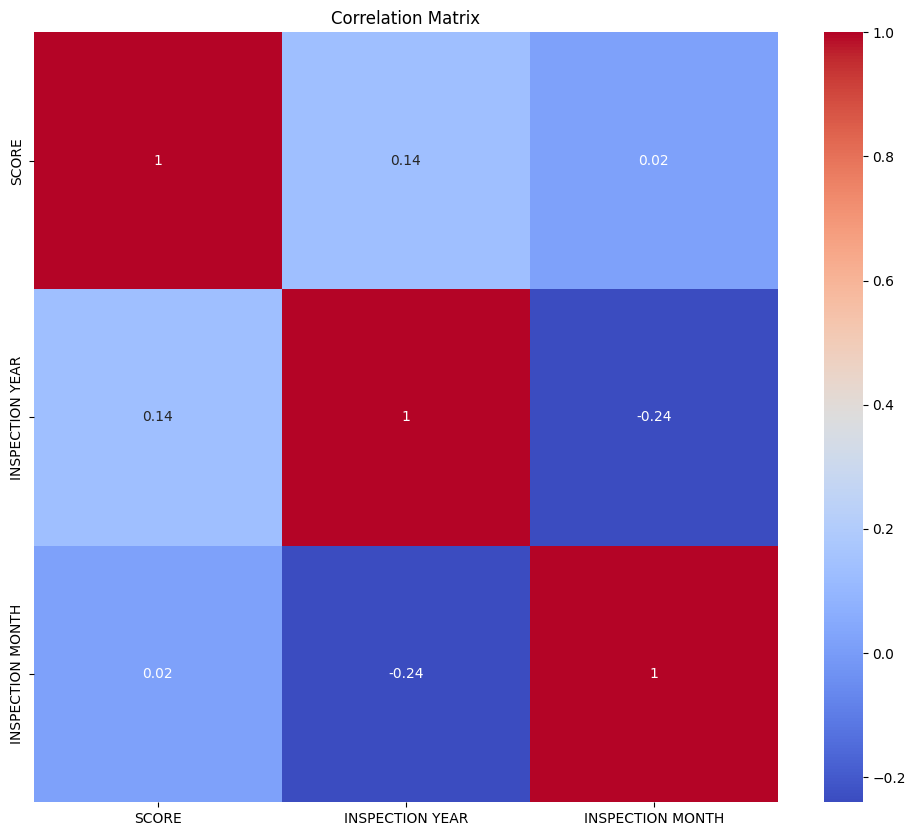

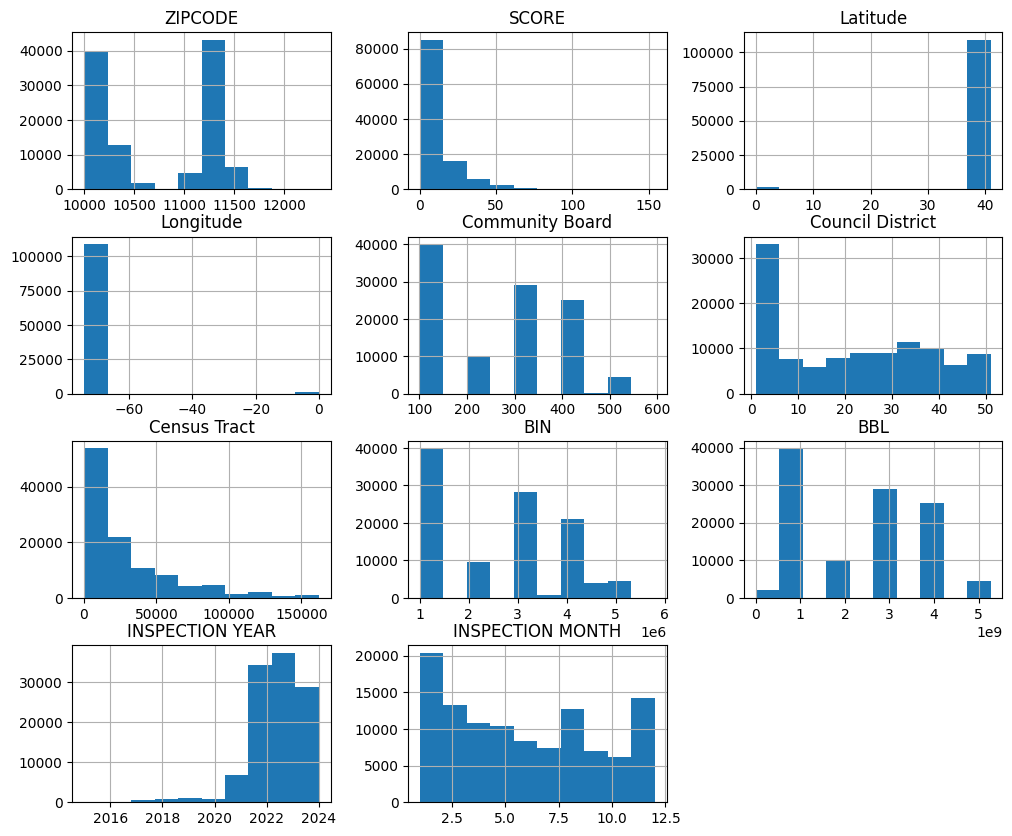

ValueError: Could not interpret value `DBA` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [29]:
# prompt: perform exploratory data analysis

import matplotlib.pyplot as plt
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)











#excluding some categorical and geographical attributes that dont have a linear relationship with other numerical variables
exclude_columns = ['ZIPCODE', 'Latitude', 'Longitude', 'Community Board',
                   'Council District', 'Census Tract', 'BIN', 'BBL', 'Borough_Bronx','Borough_Brooklyn','Borough_Manhattan','Borough_Queens','Borough_Staten Island']





# Select only the columns you want to include
included_columns = [col for col in df.columns if col not in exclude_columns]

# Calculate the correlation matrix on the selected columns

correlation_matrix = df[included_columns].corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Distribution of numerical features
df.hist(figsize=(12, 10))
plt.show()

# Countplot for categorical features
for col in categorical_columns:
  plt.figure(figsize=(10, 6))
  sns.countplot(x=col, data=df)
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=45)
  plt.show()

# Boxplot for numerical features against a categorical feature
sns.boxplot(x='GRADE', y='INSPECTION YEAR', data=df)
plt.title('Boxplot of Inspection Year by Grade')
plt.show()

# Pairplot for selected features
sns.pairplot(df[['INSPECTION YEAR', 'ZIPCODE', 'Latitude', 'Longitude']])
plt.show()


POWER BI DASHBOARDS